In [51]:
import pandas as pd

# Load the dataframe from the CSV file
df = pd.read_csv('final_youtube_videos_data.csv')

df = df.drop(columns=['dislike_count', 'dislike_per_view'])

In [52]:
# Filter the dataframe where the 'downloaded' column is True
df = df[df['downloaded'] == True]

# Update the column display limit to ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Display the dataframe
df.head(2)

,channel_name,channel_id,channel_url,channel_description,channel_join_date,subscriber_count,video_id,video_url,title,description,published_at,tags,view_count,like_count,comment_count,duration_seconds,views_per_sub,like_per_view,comment_per_view,video_count,avg_views_per_sub,avg_like_per_view,avg_dislike_per_view,avg_comment_per_view,downloaded_resolution,downloaded
0,Coca-Cola,UCosXctaTYxN4YPIvI5Fpcrw,https://www.youtube.com/@Coca-Cola,Welcome to Coca-Cola's YouTube channel! Our ch...,2006-01-01T20:14:52Z,4600000,bUmlEHAY0ZM,https://www.youtube.com/watch?v=bUmlEHAY0ZM,Bende Son Durum: Notlar Kimde?,Kimsede olmayan o notlara ulaşmak için iki Coc...,2018-04-02T14:02:54Z,NaN,4222304,100.0,7,13,0.917892,0.000024,0.000002,373,1.455785,0.00038,NaN,0.000016,360p,True
1,Coca-Cola,UCosXctaTYxN4YPIvI5Fpcrw,https://www.youtube.com/@Coca-Cola,Welcome to Coca-Cola's YouTube channel! Our ch...,2006-01-01T20:14:52Z,4600000,GqTInHO_Fj8,https://www.youtube.com/watch?v=GqTInHO_Fj8,All New Coca-Cola Spiced | Monolith,The all-new Coca-Cola Spiced could taste like ...,2024-02-21T20:29:43Z,"Coca-Cola,Coca Cola,Coke",2509088,122.0,14,16,0.545454,0.000049,0.000006,373,1.455785,0.00038,NaN,0.000016,360p,True


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the specified columns
df[['normalized_views_per_sub', 'normalized_like_per_view', 'normalized_comment_per_view']] = scaler.fit_transform(
    df[['views_per_sub', 'like_per_view', 'comment_per_view']]
)

In [ ]:
# Randomly pick 3 instances based on the 'channel_name' column
df_sampled = df.groupby('channel_name').sample(n=2, random_state=42)

# Display the resulting DataFrame
df_sampled


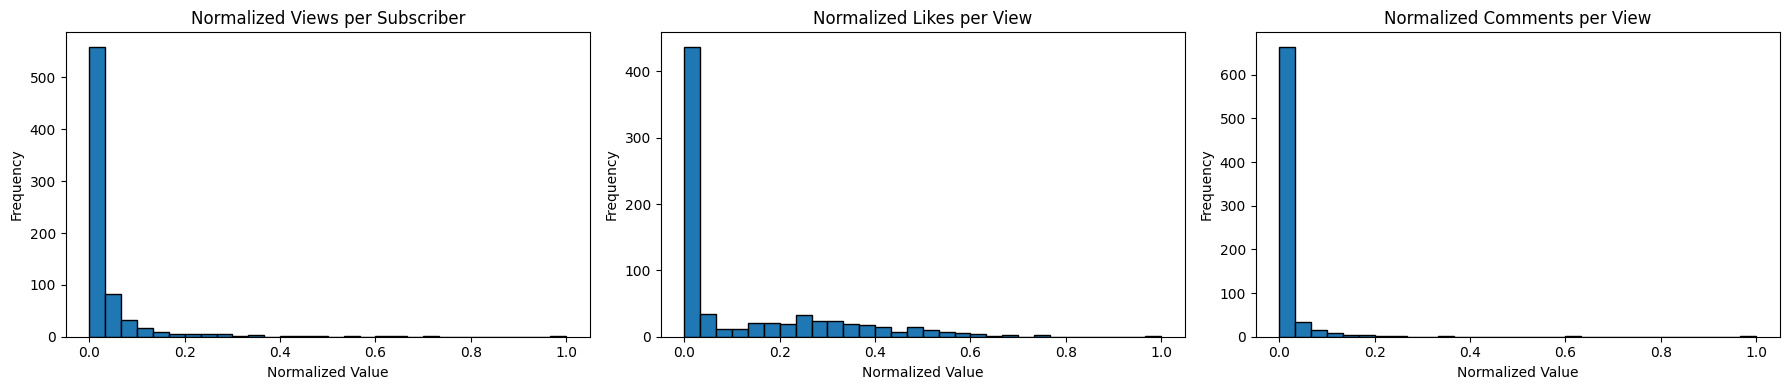

In [54]:
import matplotlib.pyplot as plt

# Plot the distributions of normalized columns
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

columns = ['normalized_views_per_sub', 'normalized_like_per_view', 'normalized_comment_per_view']
titles = ['Normalized Views per Subscriber', 'Normalized Likes per View', 'Normalized Comments per View']

for ax, col, title in zip(axes, columns, titles):
    ax.hist(df[col], bins=30, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Normalized Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


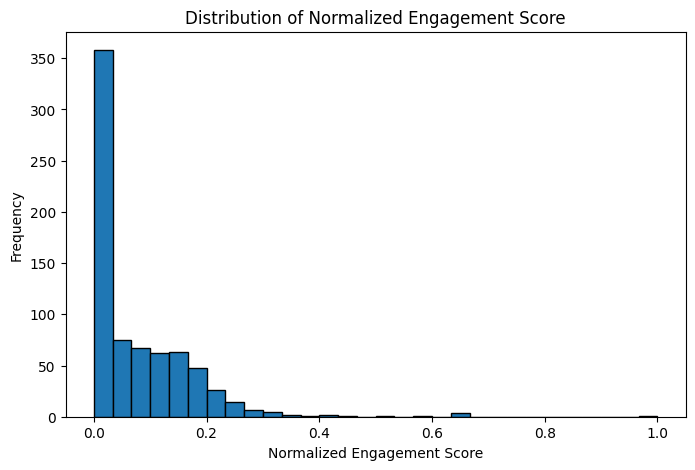

In [55]:
# Add a new column for normalized engagement score
df['normalized_engagement_score'] = (
    df['normalized_views_per_sub']*2 +
    df['normalized_like_per_view'] +
    df['normalized_comment_per_view']*3
)

# Normalize the column
df[['normalized_engagement_score']] = scaler.fit_transform(
    df[['normalized_engagement_score']]
)

# Plot the distribution of the normalized engagement score
plt.figure(figsize=(8, 5))
plt.hist(df['normalized_engagement_score'], bins=30, edgecolor='black')
plt.title('Distribution of Normalized Engagement Score')
plt.xlabel('Normalized Engagement Score')
plt.ylabel('Frequency')
plt.show()



In [63]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Assuming 'df' is your DataFrame

# Initialize the PowerTransformer with Box-Cox
pt = PowerTransformer(method='box-cox')

# Extract values as 2D array (required by transformer)
normalized_engagement_array = df[['normalized_engagement_score']].values

# Fit and transform the values
df['transformed_engagement_score'] = pt.fit_transform(normalized_engagement_array)

# Optional: print the lambda used for Box-Cox transformation
print("Lambda used for Box-Cox transformation:", pt.lambdas_[0])

# Display resulting DataFrame
display(df.head())

Lambda used for Box-Cox transformation: 0.14903809318490105


,channel_name,channel_id,channel_url,channel_description,channel_join_date,subscriber_count,video_id,video_url,title,description,published_at,tags,view_count,like_count,comment_count,duration_seconds,views_per_sub,like_per_view,comment_per_view,video_count,avg_views_per_sub,avg_like_per_view,avg_dislike_per_view,avg_comment_per_view,downloaded_resolution,downloaded,normalized_views_per_sub,normalized_like_per_view,normalized_comment_per_view,normalized_engagement_score,transformed_engagement_score
0,Coca-Cola,UCosXctaTYxN4YPIvI5Fpcrw,https://www.youtube.com/@Coca-Cola,Welcome to Coca-Cola's YouTube channel! Our ch...,2006-01-01T20:14:52Z,4600000,bUmlEHAY0ZM,https://www.youtube.com/watch?v=bUmlEHAY0ZM,Bende Son Durum: Notlar Kimde?,Kimsede olmayan o notlara ulaşmak için iki Coc...,2018-04-02T14:02:54Z,NaN,4222304,100.0,7,13,0.917892,0.000024,1.657863e-06,373,1.455785,0.00038,NaN,0.000016,360p,True,0.005730,0.000195,0.000165,0.003862,-1.334206
1,Coca-Cola,UCosXctaTYxN4YPIvI5Fpcrw,https://www.youtube.com/@Coca-Cola,Welcome to Coca-Cola's YouTube channel! Our ch...,2006-01-01T20:14:52Z,4600000,GqTInHO_Fj8,https://www.youtube.com/watch?v=GqTInHO_Fj8,All New Coca-Cola Spiced | Monolith,The all-new Coca-Cola Spiced could taste like ...,2024-02-21T20:29:43Z,"Coca-Cola,Coca Cola,Coke",2509088,122.0,14,16,0.545454,0.000049,5.579717e-06,373,1.455785,0.00038,NaN,0.000016,360p,True,0.000617,0.000445,0.000555,0.000979,-1.931496
2,Coca-Cola,UCosXctaTYxN4YPIvI5Fpcrw,https://www.youtube.com/@Coca-Cola,Welcome to Coca-Cola's YouTube channel! Our ch...,2006-01-01T20:14:52Z,4600000,0_5Dt4yMUCs,https://www.youtube.com/watch?v=0_5Dt4yMUCs,Coca-Cola Dashain Dhamaka Offer - 2L Pack,Coca-Cola’s Dashain Dhamaka Offer is here! Thi...,2024-09-03T12:25:31Z,"2L Pack,Coca-Cola Nepal,Dashan Dhamaka Offer",6296335,623.0,39,11,1.368768,0.000099,6.194080e-06,373,1.455785,0.00038,NaN,0.000016,360p,True,0.011919,0.000950,0.000616,0.008607,-0.924575
3,Coca-Cola,UCosXctaTYxN4YPIvI5Fpcrw,https://www.youtube.com/@Coca-Cola,Welcome to Coca-Cola's YouTube channel! Our ch...,2006-01-01T20:14:52Z,4600000,pvMRdKdncQY,https://www.youtube.com/watch?v=pvMRdKdncQY,喝Coke 互動歌手瓶，抽演唱會門票 !,打開「可口可樂」互動歌手瓶，演唱會門票天天抽！\n即日起至 8月31日止，輸入 Coke 指...,2018-06-26T10:16:41Z,NaN,2892029,112.0,6,16,0.628702,0.000039,2.074668e-06,373,1.455785,0.00038,NaN,0.000016,360p,True,0.001760,0.000346,0.000206,0.001353,-1.801708
4,Coca-Cola,UCosXctaTYxN4YPIvI5Fpcrw,https://www.youtube.com/@Coca-Cola,Welcome to Coca-Cola's YouTube channel! Our ch...,2006-01-01T20:14:52Z,4600000,3Vl704ZZMOE,https://www.youtube.com/watch?v=3Vl704ZZMOE,Coca-Cola® Obra de Arte,A Magia Acontece quando você precisa de um pou...,2023-03-07T14:01:37Z,NaN,20018871,493.0,9,15,4.351928,0.000025,4.495758e-07,373,1.455785,0.00038,NaN,0.000016,360p,True,0.052872,0.000205,0.000045,0.034620,-0.085609


In [58]:
import numpy as np

# Convert the column to a NumPy array and reshape it to 2D
normalized_engagement_array = np.array(df['normalized_engagement_score']).reshape(-1, 1)
print(normalized_engagement_array.shape)  # Verify the shape

(738, 1)


In [59]:
# Find the unique sorted values in the array
unique_values = np.unique(normalized_engagement_array)

# Get the second smallest value
second_smallest_value = unique_values[1]  # Index 1 corresponds to the second smallest value
# print(unique_values)

# Replace all zero values with the second smallest value
normalized_engagement_array[normalized_engagement_array == 0] = second_smallest_value

# Verify the changes
# print(normalized_engagement_array)

In [ ]:
import numpy as np
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

# y_train: original target values, all positive
pt = PowerTransformer(method='box-cox')       # 1. Box-Cox transformer
y_bc = pt.fit_transform(normalized_engagement_array)  # fit and transform (needs 2D array)

# After Box-Cox, y_bc is roughly Gaussian distributed (mean ~0). It can have negative values.
# 2. Scale Box-Cox output to [0,1]:
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_bc)  # now scaled to 0-1

# Train the MLP on X_train with y_train_scaled as target...

# After training, invert on predictions:
y_pred_scaled = np.array(y_train_scaled)               # model's sigmoid outputs on test set
y_pred_bc = scaler.inverse_transform(y_pred_scaled)   # back to Box-Cox domain
y_pred_orig = pt.inverse_transform(y_pred_bc)         # back to original target domain

# print(y_pred_orig.flatten())  # final predictions in original scale


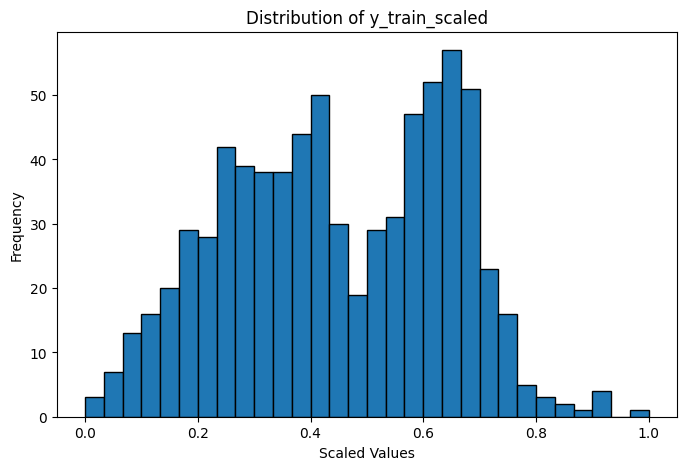

In [61]:
plt.figure(figsize=(8, 5))
plt.hist(y_train_scaled.flatten(), bins=30, edgecolor='black')
plt.title('Distribution of y_train_scaled')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')
plt.show()

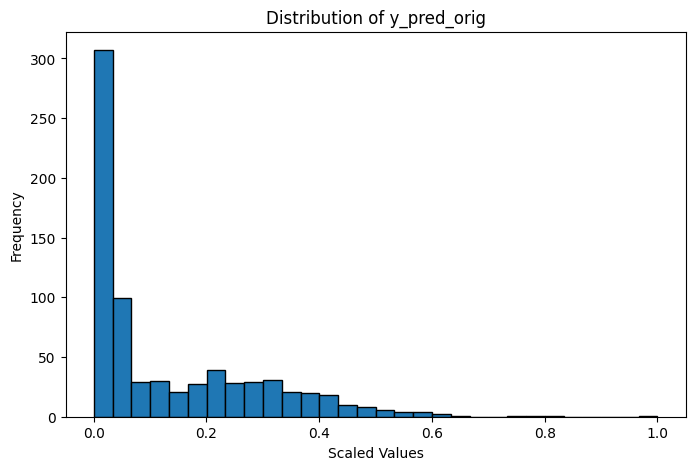

In [32]:
plt.figure(figsize=(8, 5))
plt.hist(y_pred_orig.flatten(), bins=30, edgecolor='black')
plt.title('Distribution of y_pred_orig')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')
plt.show()

In [64]:
df.to_csv('final_data.csv', index=False)

In [8]:
rounded_values = [round(value, 3) for value in df['normalized_engagement_score'].tolist()]
print(rounded_values)

[0.005, 0.001, 0.01, 0.002, 0.041, 0.009, 0.012, 0.009, 0.004, 0.018, 0.005, 0.009, 0.001, 0.005, 0.008, 0.003, 0.003, 0.001, 0.02, 0.09, 0.007, 0.016, 0.006, 0.002, 0.002, 0.015, 0.004, 0.001, 0.034, 0.005, 0.042, 0.006, 0.004, 0.012, 0.007, 0.001, 0.007, 0.008, 0.035, 0.059, 0.002, 0.278, 0.012, 0.008, 0.001, 0.014, 0.019, 0.047, 0.03, 0.036, 0.015, 0.017, 0.002, 0.005, 0.059, 0.002, 0.014, 0.002, 0.008, 0.001, 0.002, 0.003, 0.019, 0.024, 0.025, 0.005, 0.044, 0.005, 0.003, 0.016, 0.003, 0.039, 0.002, 0.004, 0.004, 0.005, 0.042, 0.038, 0.01, 0.019, 0.026, 0.011, 0.008, 0.02, 0.003, 0.003, 0.03, 0.021, 0.003, 0.04, 0.052, 0.039, 0.002, 0.001, 0.005, 0.002, 0.006, 0.003, 0.002, 0.0, 0.038, 0.005, 0.005, 0.008, 0.008, 0.009, 0.053, 0.003, 0.145, 0.005, 0.004, 0.007, 0.082, 0.008, 0.003, 0.019, 0.0, 0.003, 0.029, 0.001, 0.033, 0.017, 0.002, 0.08, 0.001, 0.001, 0.008, 0.026, 0.02, 0.037, 0.048, 0.012, 0.003, 0.025, 0.015, 0.121, 0.355, 0.503, 0.402, 0.302, 0.531, 0.181, 0.461, 0.477, 0.134

In [10]:
import random

# Randomly select 150 values from the list
random_values = random.sample(rounded_values, 70)

# Print the selected values
print(random_values)

[0.006, 0.134, 0.021, 0.233, 0.2, 0.308, 0.039, 0.252, 0.214, 0.026, 0.005, 0.009, 0.009, 0.233, 0.035, 0.033, 0.013, 0.021, 0.037, 0.031, 0.242, 0.009, 0.038, 0.025, 0.436, 0.029, 0.025, 0.018, 0.001, 0.016, 0.204, 0.381, 0.03, 0.016, 0.29, 0.107, 0.026, 0.248, 0.038, 0.073, 0.015, 0.039, 0.107, 0.282, 0.022, 0.556, 0.153, 0.28, 0.002, 0.057, 0.011, 0.083, 0.026, 0.277, 0.044, 0.585, 0.103, 0.003, 0.01, 0.08, 0.031, 0.001, 0.325, 0.038, 0.331, 0.001, 0.001, 0.267, 0.272, 0.291]


In [11]:
sorted_random_values = sorted(random_values)
print(sorted_random_values)

[0.001, 0.001, 0.001, 0.001, 0.002, 0.003, 0.005, 0.006, 0.009, 0.009, 0.009, 0.01, 0.011, 0.013, 0.015, 0.016, 0.016, 0.018, 0.021, 0.021, 0.022, 0.025, 0.025, 0.026, 0.026, 0.026, 0.029, 0.03, 0.031, 0.031, 0.033, 0.035, 0.037, 0.038, 0.038, 0.038, 0.039, 0.039, 0.044, 0.057, 0.073, 0.08, 0.083, 0.103, 0.107, 0.107, 0.134, 0.153, 0.2, 0.204, 0.214, 0.233, 0.233, 0.242, 0.248, 0.252, 0.267, 0.272, 0.277, 0.28, 0.282, 0.29, 0.291, 0.308, 0.325, 0.331, 0.381, 0.436, 0.556, 0.585]
